## Inhibitory Feedback

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# Parameters
num_cells = 180
timesteps = 100
gamma = 5           # Inhibition strength
step_size = 5          # Degrees per timestep (random walk)
sigma = 40             # Width of the input bump

preferred_directions = np.linspace(0, 360, num_cells)
theta = np.deg2rad(preferred_directions)

In [3]:
def circular_gaussian(x, mu, sigma):
    delta = np.angle(np.exp(1j * np.deg2rad(x - mu)), deg=True)
    return np.exp(-0.5 * (delta / sigma) ** 2)

In [4]:
# Initialize
current_direction = 0
activity = circular_gaussian(preferred_directions, current_direction, sigma)
activity_over_time = [activity.copy()]
direction_over_time = [current_direction]
input_strength_over_time = []
inhibition_over_time = []
total_activity_over_time = []

In [5]:
for t in range(1, timesteps):
    delta = np.random.uniform(-step_size, step_size)
    current_direction = (current_direction + delta) % 360
    direction_over_time.append(current_direction)

    input_bump = circular_gaussian(preferred_directions, current_direction, sigma)
    input_strength = input_bump.sum()
    inhibition = gamma * np.mean(activity)

    activity = activity + input_bump - inhibition
    activity = np.clip(activity, 0, None)

    activity_over_time.append(activity.copy())
    input_strength_over_time.append(input_strength)
    inhibition_over_time.append(inhibition * num_cells)  # total inhibition
    total_activity_over_time.append(activity.sum())

activity_over_time = np.array(activity_over_time)

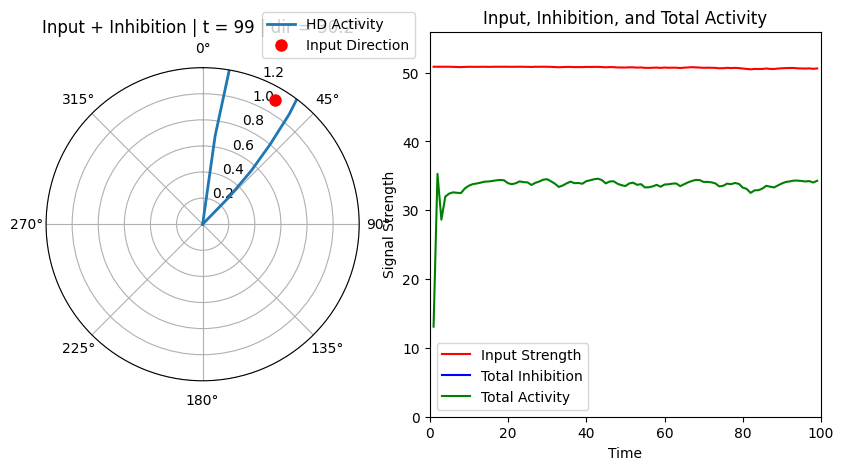

In [6]:
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 1.5])

# Polar plot
ax_polar = fig.add_subplot(gs[0], polar=True)
ax_polar.set_theta_zero_location("N")
ax_polar.set_theta_direction(-1)
ax_polar.set_rlim(0, 1.2)
line, = ax_polar.plot([], [], lw=2, label='HD Activity')
marker, = ax_polar.plot([], [], 'ro', markersize=8, label='Input Direction')
ax_polar.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

# Line plot (input/inhibition)
ax_diag = fig.add_subplot(gs[1])
ax_diag.set_xlim(0, timesteps)
ax_diag.set_ylim(0, max(input_strength_over_time + total_activity_over_time) * 1.1)
ax_diag.set_xlabel("Time")
ax_diag.set_ylabel("Signal Strength")
ax_diag.set_title("Input, Inhibition, and Total Activity")

line_input, = ax_diag.plot([], [], 'r-', label='Input Strength')
line_inhib, = ax_diag.plot([], [], 'b-', label='Total Inhibition')
line_total, = ax_diag.plot([], [], 'g-', label='Total Activity')
ax_diag.legend()

# Animation update function
def update(frame):
    # --- Polar update ---
    current_activity = activity_over_time[frame]
    line.set_data(theta, current_activity)
    input_angle = np.deg2rad(direction_over_time[frame])
    marker.set_data([input_angle], [1.1])
    ax_polar.set_title(f"Input + Inhibition | t = {frame} | dir = {direction_over_time[frame]:.1f}°")

    # --- Diagnostic plot update ---
    x_vals = np.arange(1, frame+1)
    line_input.set_data(x_vals, input_strength_over_time[:frame])
    line_inhib.set_data(x_vals, inhibition_over_time[:frame])
    line_total.set_data(x_vals, total_activity_over_time[:frame])
    return line, marker, line_input, line_inhib, line_total

# Animate
ani = animation.FuncAnimation(
    fig, update,
    frames=timesteps,
    interval=100,
    blit=True,
    repeat=False
)


ani.save('plot_ani/rsc_hd_inhibitory.gif', writer='pillow', fps=20);